In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.ticker as ticker
import matplotlib.patches as patches
from itertools import product
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
plt.style.use("ggplot")

In [3]:
OFFSET = -350

def polar(x, y):
    
    # to come to necessary rotation
    add_on = 0.0
    
    # to center coordinates
    x += OFFSET
    y += OFFSET
    
    # rotation
    if x < 0 and y < 0:
        add_on = 180.0
    elif x < 0 and y > 0:
        add_on = 180.0
    elif x > 0 and y < 0:
        add_on = 360.0
    
    r = (x ** 2 + y ** 2) ** .5
    theta = math.degrees(math.atan(float(y) / x))
    return r, theta + add_on

In [4]:
def simulate_data(countries, products):
    data = []
    
    for comb in product(countries, products):
        data.append(list(comb) + [np.random.randint(low=100, high=500), np.random.randint(low=100, high=1000)])
    
    return pd.DataFrame(data=data, columns=["country", "product", "clients", "revenue"])

In [5]:
colors = ["red", "green", "blue", "yellow", "cyan"]

df = simulate_data(
    countries=["Japan", "USA", "Belarus", "Australia"], 
    products=["Product 1", "Product 2", "Product 3", "Product 4", "Product 5"]
)

In [6]:
df.head(20)

,country,product,clients,revenue
0,Japan,Product 1,411,962
1,Japan,Product 2,336,523
2,Japan,Product 3,258,346
3,Japan,Product 4,333,543
4,Japan,Product 5,131,906
5,USA,Product 1,330,183
6,USA,Product 2,445,737
7,USA,Product 3,206,355
8,USA,Product 4,259,752
9,USA,Product 5,190,617


In [7]:
def get_centers(widths, offset=0.0):
    a = []
    s = offset
    for i in xrange(len(widths)):
        a.append(widths[i] / 2 + s)
        s += widths[i]
    return a


In [8]:
def get_bars_with_annotation(ax, df, quadrant_number):

    # bars count
    N = len(df)

    radii = df.revenue.values
    width = (df.clients / df.clients.sum()).values * (0.5 * np.pi - np.pi / N)  # with offset
    centers = get_centers(
        (df.clients / df.clients.sum()).values * (0.5 * np.pi - np.pi / (4*N)), 
        offset=np.pi / 32
    )
    centers = [quadrant_number * np.pi / 2 + c for c in centers]
    
    bars = ax.bar(
        centers, 
        radii, 
        width=width, 
        bottom=0.0
    )
    
    # set colors and opacity
    for bar, color in zip(bars, colors):
        bar.set_facecolor(color)
        bar.set_alpha(1.0)
        
    # set annotations
    for bar, clients_count, revenue in zip(bars, df.clients.values, df.revenue.values):
        
        annotation = ax.annotate(
            "Clients count = {}\nRevenue = {}K$".format(clients_count, revenue),
            xy=(bar.get_bbox().bounds[0], bar.get_bbox().bounds[3]), xycoords='polar',
            xytext=(bar.get_bbox().bounds[0], bar.get_bbox().bounds[3]), textcoords='data',
            horizontalalignment="left", bbox=dict(boxstyle="round", facecolor="w", 
                                                  edgecolor="0.5", alpha=0.9)
        )
        # by default, disable the annotation visibility
        annotation.set_visible(False)
        bars_with_annotation.append([bar, annotation])
    
    return ax

In [9]:
def on_move(event):
    visibility_changed = False
    for bar, annotation in bars_with_annotation:
        should_be_visible = False
        
        r, theta = polar(event.x, event.y)
        
        theta = (theta) / 180 * np.pi
        
        if (bar.get_bbox().bounds[0] < theta < bar.get_bbox().bounds[0] + bar.get_bbox().bounds[2]) and (r < bar.get_bbox().bounds[3]):
            should_be_visible = True
        
        if should_be_visible != annotation.get_visible():
            visibility_changed = True
            annotation.set_visible(should_be_visible)

    if visibility_changed:        
        plt.draw()

<IPython.core.display.Javascript object>


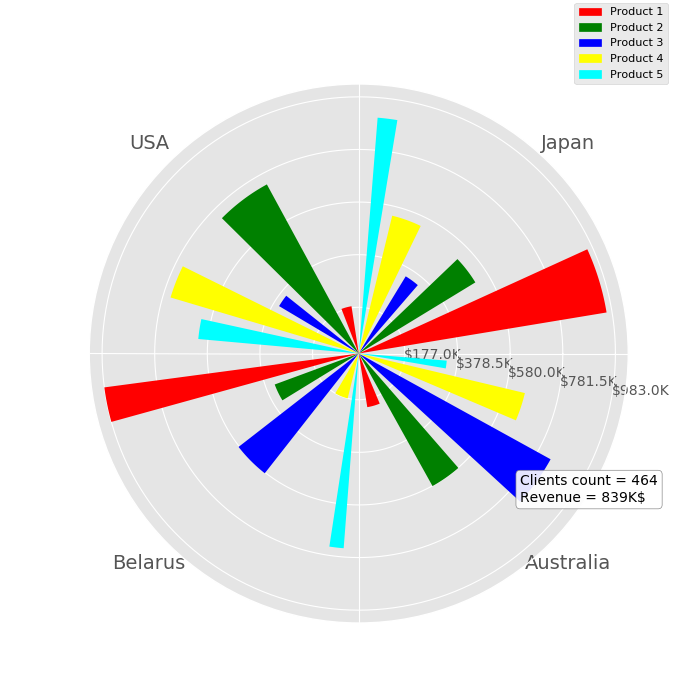

In [10]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='polar')

bars_with_annotation = []

countries = df.country.unique()

for i in xrange(len(countries)):
    ax = get_bars_with_annotation(ax, df[df.country == countries[i]], i)

ticks = ax.set_xticks(
    [0, np.pi / 4, np.pi / 2, 3.0 / 4 * np.pi, np.pi, np.pi / 5.0 * 4, np.pi * 3.0 / 2, 
     np.pi * 7.0 / 4
    ], 2 * np.pi
)
ticks_labels = ax.set_xticklabels(
    ["", countries[0], "", countries[1], "", countries[2], "", countries[3]], 
    fontsize=14
)
formatter = ticker.FormatStrFormatter('$%1.1fK')
ax.yaxis.set_major_formatter(formatter)
ax.set_rticks(np.linspace(min(df.revenue), max(df.revenue), num=5))
ax.set_rlabel_position(-10)
    
ax.get_xgridlines()[1].set_ydata([0])
ax.get_xgridlines()[3].set_ydata([0])
ax.get_xgridlines()[5].set_ydata([0])
ax.get_xgridlines()[7].set_ydata([0])

on_move_id = fig.canvas.mpl_connect('motion_notify_event', on_move)

patches_list = []
for i in xrange(5):
    patches_list.append(patches.Patch(color=colors[i], label='Product {}'.format(i+1)))

plt.legend(handles=patches_list, loc=(0.9, 1), ncol=1, fontsize=8)

plt.show()

In [12]:
df.head(20)

,country,product,clients,revenue
0,Japan,Product 1,168,213
1,Japan,Product 2,242,929
2,Japan,Product 3,473,367
3,Japan,Product 4,116,137
4,Japan,Product 5,470,653
5,USA,Product 1,214,291
6,USA,Product 2,455,831
7,USA,Product 3,244,291
8,USA,Product 4,336,844
9,USA,Product 5,112,882


<IPython.core.display.Javascript object>


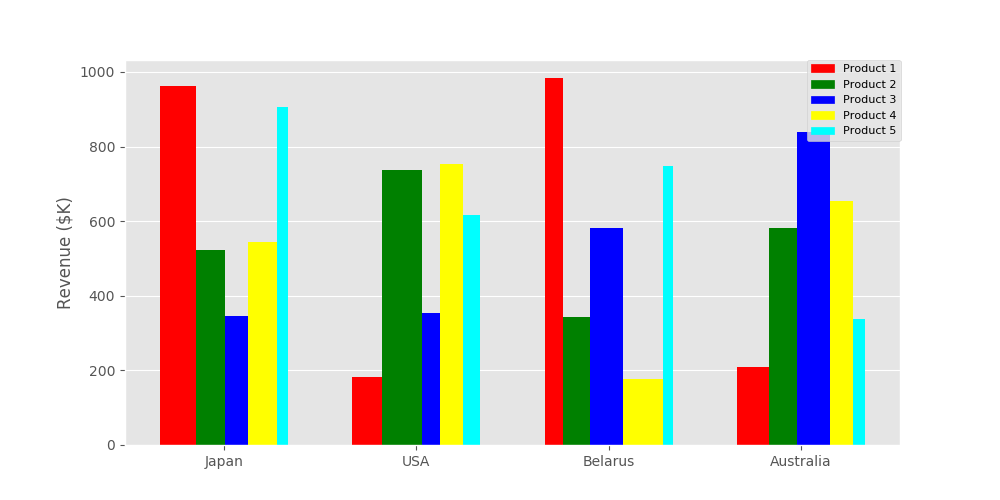

/home/r_merkulov/anaconda2/lib/python2.7/site-packages/matplotlib/artist.py:233: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)


In [11]:
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

offset = 0.0

xticks = []
xticks_labels = []

bars_with_annotation = []

for i in xrange(len(countries)):
    radii = df[df.country == countries[i]].revenue.values
    width = (df[df.country == countries[i]].clients / df[df.country == countries[i]].clients.sum()).values
    centers = get_centers((df[df.country == countries[i]].clients / df[df.country == countries[i]].clients.sum()).values)

    bars = ax.bar([offset + c for c in centers], radii, width, alpha=0.5, color=colors)
    
    for bar in bars:
        bar.set_alpha(1.0)
        
    for bar, clients_count, revenue in zip(
        bars, df[df.country == countries[i]].clients.values, df[df.country == countries[i]].revenue.values
    ):
        
        _ax = bar.get_axes()
        
        annotation = _ax.annotate(
            "Clients count = {}\nRevenue = {}K$".format(clients_count, revenue),
            xy=(bar.get_bbox().bounds[0], bar.get_bbox().bounds[3]), xycoords='data',
            xytext=(bar.get_bbox().bounds[0], bar.get_bbox().bounds[3]), textcoords='data',
            horizontalalignment="left",
            bbox=dict(boxstyle="round", facecolor="w", edgecolor="0.5", alpha=0.9)
        )
        # by default, disable the annotation visibility
        annotation.set_visible(False)
        bars_with_annotation.append([bar, annotation])
    
    xticks.append(offset + 0.5)
    xticks_labels.append(countries[i])
    offset += 1.5


ax.set_ylabel('Revenue ($K)')
ax.set_xticks(xticks)
ax.set_xticklabels(xticks_labels)


def on_move(event):
    visibility_changed = False
    for bar, annotation in bars_with_annotation:
        should_be_visible = bar.contains_point((event.x, event.y))
        
        if should_be_visible != annotation.get_visible():
            visibility_changed = True
            annotation.set_visible(should_be_visible)

    if visibility_changed:        
        plt.draw()

on_move_id = fig.canvas.mpl_connect('motion_notify_event', on_move)


plt.legend(handles=patches_list, loc=(0.88, 0.79), ncol=1, fontsize=8)
plt.grid(axis="x")
plt.show()